In [1]:
import math 
import random
import numpy as np
import matplotlib.pyplot as plt

### Solución del problema de la mochila con algoritmos géneticos - Método estacionario

In [2]:
po = 4 #Número de individuos por población
pm = 0.15 #Probabilidad de mutación
pc = 0.9 #Probabilidad de cruzamiento
GenMax = 10 #Número de generaciones máx

In [3]:
#Definimos la cantidad de objetos, el peso minimo de un objeto y el peso maximo (aleatoriamente)
Cantidad_objetos = 20
Peso_minimo = 20 #kilogramos
Peso_maximo = 80 #kilogramos
Peso_objetos = random.sample(range(Peso_minimo,Peso_maximo), Cantidad_objetos)

#Definimos el valor de esos objetos (aleatoriamente)
valor_minimo = 100 #euros
valor_maximo = 1200 #euros
Valor_objetos = random.sample(range(valor_minimo,valor_maximo), Cantidad_objetos)

#Definimos el peso máximo que soporta la mochila
Peso_maximo = 750 #kilogramos

In [6]:
#Generamos la población inicial 
pesos_pob=[]
fitness_pob=[]
for i in range(po):
    Peso_vec_sol = Peso_maximo+1
    while Peso_vec_sol > Peso_maximo:
        print(Peso_vec_sol)
        Vector_sol = np.random.choice([0, 1], size=Cantidad_objetos)
        Peso_vec_sol = sum(Peso_objetos * Vector_sol)
        fitness = sum(Valor_objetos * Vector_sol)
    if i == 0:
        mat_pob = Vector_sol.copy()
    else:
        mat_pob = np.vstack([mat_pob, Vector_sol])
    pesos_pob.append(Peso_vec_sol)
    fitness_pob.append(fitness)

751
751
751
751


In [5]:
print(mat_pob)
print(pesos_pob)

[[1 1 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0]
 [1 0 0 1 1 1 1 0 1 1 0 0 1 1 0 1 0 0 0 0]
 [1 0 0 0 0 1 0 0 0 0 0 1 1 1 1 0 1 0 1 0]
 [1 1 0 1 0 0 1 0 0 1 0 0 1 0 1 0 0 1 0 0]]
[279, 492, 413, 388]


In [7]:
fitness_pob

[5686, 5962, 4755, 4782]

In [8]:
#Guardamos la mejor solución de la población
Max_sol_fitness = mat_pob[np.argmax(np.array(fitness_pob))]
Max_sol_fitness

array([0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0])

In [10]:
padre1, padre2 = seleccion_padres(mat_pob,fitness_pob)

In [11]:
print(padre1)
print(padre2)

[0 1 1 1 0 0 0 1 1 1 0 1 1 0 1 0 1 0 0 0]
[1 0 1 0 0 0 1 0 0 1 1 1 1 1 0 1 1 0 0 0]


In [13]:
hijo1,hijo2 = cruzamiento(padre1,padre2)
print(hijo1)
print(hijo2)

[0 1 1 1 0 0 0 1 1 1 0 1 1 0 1 0 1 0 0 0]
[1 0 1 0 0 0 1 0 0 1 1 1 1 1 0 1 1 0 0 0]


In [16]:
hijo1, hijo2 = mutacion(hijo1, hijo2, pm, Peso_maximo,Peso_objetos)
print(hijo1)
print(hijo2)

[0 1 1 1 0 0 0 1 1 1 0 1 1 1 1 0 1 0 0 0]
[1 0 1 0 0 0 1 0 0 1 1 1 1 1 0 1 1 0 0 0]


In [19]:
mat_pob = reemplazo(mat_pob,fitness_pob,hijo1,hijo2)
mat_pob

array([[1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0],
       [0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0],
       [0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0],
       [1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0]])

In [26]:
def poblacion_inicial(po,Peso_maximo,Cantidad_objetos,Peso_objetos,Valor_objetos):
    pesos_pob=[]
    fitness_pob=[]
    for i in range(po):
        Peso_vec_sol = Peso_maximo+1
        while Peso_vec_sol > Peso_maximo:
            Vector_sol = np.random.choice([0, 1], size=Cantidad_objetos)
            Peso_vec_sol = sum(Peso_objetos * Vector_sol)
            fitness = sum(Valor_objetos * Vector_sol)
        if i == 0:
            mat_pob = Vector_sol.copy()
        else:
            mat_pob = np.vstack([mat_pob, Vector_sol])
        pesos_pob.append(Peso_vec_sol)
        fitness_pob.append(fitness)
    return mat_pob, fitness_pob

In [9]:
# Función para la selección de padres por torneo
def seleccion_padres(mp,fp):
    fp2 = fp.copy()
    padre1= mp[np.argmax(fp2)]
    fp2[np.argmax(fp2)]= 0
    padre2 = mp[np.argmax(fp2)]
    return padre1, padre2

In [12]:
#Función de cruzamiento para los padres (Cruzamiento binario 1 punto)
def cruzamiento(padre1,padre2):
    corte = np.random.randint(1,len(padre1))
    hijo1 = np.hstack((padre1[0:corte],padre2[corte:]))
    hijo2 = np.hstack((padre2[0:corte],padre1[corte:]))
    return hijo1, hijo2

In [15]:
#Función de mutación para los hijos

def mutacion(hijo1, hijo2, pm, Peso_maximo,Peso_objetos):
    #Mutación Hijo 1
    if np.random.rand(1) < pm:
        peso = Peso_maximo+1
        while peso > Peso_maximo:
            Posicion = random.randint(0,len(hijo1)-1) #Elegir un objeto
            if hijo1[Posicion] == 0:
                hijo1[Posicion] = 1
            else:
                hijo1[Posicion] = 0
            peso = sum(Peso_objetos * hijo1)
    
    #Mutación Hijo 2
    if np.random.rand(1) < pm:
        peso = Peso_maximo+1
        while peso > Peso_maximo:
            Posicion = random.randint(0,len(hijo2)-1) #Elegir un objeto
            if hijo2[Posicion] == 0:
                hijo2[Posicion] = 1
            else:
                hijo2[Posicion] = 0
            peso = sum(Peso_objetos * hijo2)
            
    return hijo1,hijo2

In [17]:
#Función de reemplazo - Determinista, se reemplazan los n peores
def reemplazo(mp,fp,hijo1,hijo2):
    mp2 = mp.copy()
    fp2 = fp.copy()
    mp2[np.argmin(fp2)] = hijo1
    fp2[np.argmin(fp2)]= np.max(fp2)
    mp2[np.argmin(fp2)] = hijo2
    return mp2  

In [18]:
#Función de reemplazo - Determinista, reemplazaremos al mejor y al peor 
def reemplazo2(mp,fp,hijo1,hijo2):
    mp2 = mp.copy()
    fp2 = fp.copy()
    mp2[np.argmin(fp2)] = hijo1
    mp2[np.argmax(fp2)] = hijo2
    return mp2

In [20]:
rcruzamiento = np.random.rand(1)
if rcruzamiento < pc:
    padre1, padre2 = seleccion_padres(mat_pob,fitness_pob)
    hijo1, hijo2 = cruzamiento(padre1,padre2)
    hijo1, hijo2 = mutacion(hijo1, hijo2, pm, Peso_maximo,Peso_objetos)
    mat_pob = reemplazo(mat_pob,fitness_pob,hijo1,hijo2)

In [21]:
fitness_pob = []
for i in range(po):
    fitness_new = sum(mat_pob[i]*Valor_objetos)
    fitness_pob.append(fitness_new)
fitness_pob

[5686, 5962, 6366, 5282]

In [22]:
if sum(Max_sol_fitness*Valor_objetos) < sum(mat_pob[np.argmax(np.array(fitness_pob))]*Valor_objetos):
    Max_sol_fitness = mat_pob[np.argmax(np.array(fitness_pob))] 

### Automatizamos el proceso

In [23]:
#VALORES INICIALES

po = 4 #Número de individuos por población
pm = 0.2 #Probabilidad de mutación
pc = 0.9 #Probabilidad de cruzamiento
GenMax = 5000 #Número de generaciones máx

#Definimos la cantidad de objetos, el peso minimo de un objeto y el peso maximo (aleatoriamente)
Cantidad_objetos = 20
Peso_minimo = 20 #kilogramos
Peso_maximo = 80 #kilogramos
Peso_objetos = random.sample(range(Peso_minimo,Peso_maximo), Cantidad_objetos)

#Definimos el valor de esos objetos (aleatoriamente)
valor_minimo = 100 #euros
valor_maximo = 1200 #euros
Valor_objetos = random.sample(range(valor_minimo,valor_maximo), Cantidad_objetos)

#Definimos el peso máximo que soporta la mochila
Peso_maximo = 750 #kilogramos

In [27]:
#Generamos la población inicial 
mat_pob, fitness_pob = poblacion_inicial(po,Peso_maximo,Cantidad_objetos,Peso_objetos,Valor_objetos)

#Gurdamos en Max_sol_fitness a la mejor solución de la población 
Max_sol_fitness = mat_pob[np.argmax(np.array(fitness_pob))]

Lista_max_sol_fitness = [Max_sol_fitness]
lista_mejor_poblacion_actual=[]
for k in range(GenMax):
    rcruzamiento = np.random.rand(1)
    if rcruzamiento < pc:
        #Modelo estacionario 
        padre1, padre2 = seleccion_padres(mat_pob,fitness_pob) #Selección de padres
        hijo1, hijo2 = cruzamiento(padre1,padre2) #Cruzamiento: creación de los hijos
        hijo1, hijo2 = mutacion(hijo1, hijo2, pm, Peso_maximo,Peso_objetos) #Mutación de los hijos
        mat_pob = reemplazo2(mat_pob,fitness_pob,hijo1,hijo2) #Reemplazo de la población
        
        fitness_pob = []
        for i in range(po):
            fitness_new = sum(mat_pob[i]*Valor_objetos)
            fitness_pob.append(fitness_new)
        Mejor_poblacion_Actual = sum(mat_pob[np.argmax(np.array(fitness_pob))]*Valor_objetos)
        lista_mejor_poblacion_actual.append(Mejor_poblacion_Actual)
        
        if sum(Max_sol_fitness*Valor_objetos) < sum(mat_pob[np.argmax(np.array(fitness_pob))]*Valor_objetos):
            Max_sol_fitness = mat_pob[np.argmax(np.array(fitness_pob))] 
            Lista_max_sol_fitness.append(Max_sol_fitness)
    

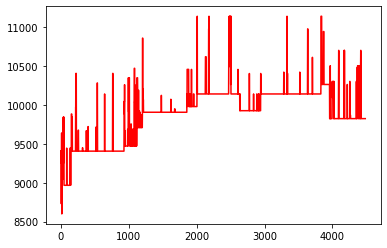

In [28]:
plt.plot(range(len(lista_mejor_poblacion_actual)),lista_mejor_poblacion_actual,color="red") #Todas las distancias

In [25]:
sum(Max_sol_fitness*Valor_objetos)

12726